<a href="https://colab.research.google.com/github/lcbjuk/ML/blob/master/Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
sal_poup = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/salario_conta%20-%20ok.csv')
sal_poup

In [0]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=5)
k.fit(sal_poup)

In [0]:
import seaborn as sns
sns.scatterplot(sal_poup['salario'], sal_poup['saldo'] , hue=k.labels_,palette=sns.color_palette('Set1',5))


**Facam pf entao o KMeans p Jogar Volei!**

In [0]:
#'previsao	temperatura	umidade	vento	jogar
volei = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/volei%20-%20ok.csv')
k = KMeans(n_clusters=2)
k.fit(volei)

sns.scatterplot(volei['temperatura'], volei['previsao'], hue=k.labels_)

**Exercicio - KMeans**

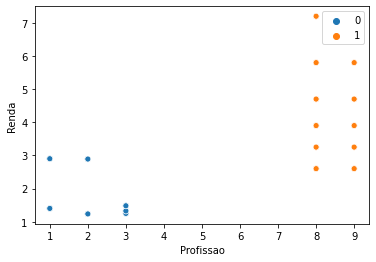

In [0]:
credito = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20sem_classe.csv')
k = KMeans(n_clusters=2)
k.fit(credito)

sns.scatterplot(credito['Profissao'],credito['Renda'], hue=k.labels_)

**Redes Neurais**

In [0]:
import pandas as pd
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/volei%20-%20ok.csv')
teste  = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/volei%20-%20prd.csv')

import tensorflow
from tensorflow import keras
rn = keras.Sequential([
  keras.layers.Input(len(treino.columns)-1),
  keras.layers.Dense(3, 'relu'),
  keras.layers.Dense(2, 'relu'),
  keras.layers.Dense(1, 'sigmoid')
])
rn.compile(optimizer='adam' , loss='binary_crossentropy')
rn.fit(treino[['previsao','temperatura','umidade','vento']] , treino['jogar'])
previsoes = rn.predict(teste[['previsao','temperatura','umidade','vento']]) 
previsoes

In [0]:
def ativacao(v):
  limiar = 0.05
  if (v > limiar):
    return 1
  else:
    return 0

for previsao in previsoes:
  print(ativacao(previsao))



**Exercicio Rede Neural**

In [0]:
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20okk.csv')
teste  = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20prever.csv')

 
nn= keras.Sequential([
      keras.layers.Input(len(treino.columns)-1),
      keras.layers.Dense(3,'relu'),
      keras.layers.Dense(2,'relu'),
      keras.layers.Dense(2,'relu'),
      keras.layers.Dense(1,'sigmoid'),
])

nn.compile(optimizer='adam' , loss='binary_crossentropy')
nn.fit(treino[['Genero'	,'GrauEscolaridade','Profissao','Renda']] , treino['Inadimplente'])
previsoes = nn.predict(teste)
previsoes

Train on 100 samples
100/100 [==============================] - 0s 4ms/sample - loss: 0.9373


array([[0.49992013],
       [0.57897586],
       [0.6784872 ],
       [0.6426147 ],
       [0.61545396],
       [0.54995334],
       [0.5065897 ],
       [0.49992013]], dtype=float32)

In [0]:
def ativacao(v):
  limiar = 0.51
  if (v > limiar):
    return 1
  else:
    return 0

for previsao in previsoes:
  print(ativacao(previsao))


0
1
1
1
1
1
0
0
